In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
train = pd.read_csv("./Data/climate_data_ind.csv")
train.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [4]:
train.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,565882.000000,551529.000000,544160.000000,541083.000000,463881.000000,545544.000000,579051.000000,576137.000000,579138.000000,589265.000000
mean,23.312111,31.528955,26.855475,82.489365,8.680760,5.083199,4.709601,188.488325,1.956680,96832.949230
std,2.280687,2.311659,1.939656,14.337669,17.928752,3.261586,2.612285,107.657452,1.803358,542.419161
min,0.000000,0.000000,0.000000,24.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,96001.000000
25%,23.000000,30.500000,26.200000,79.000000,0.000000,2.500000,3.000000,90.000000,1.000000,96293.000000
50%,24.000000,31.800000,27.200000,83.000000,1.000000,5.300000,4.000000,180.000000,2.000000,96797.000000
75%,25.000000,33.000000,28.000000,87.000000,9.300000,7.600000,6.000000,270.000000,3.000000,97240.000000
max,246.000000,334.000000,141.600000,7520.000000,1965.500000,705.000000,185.000000,931.000000,160.000000,97980.000000


In [5]:
train.drop(['station_id', 'ddd_car'], axis=1, inplace=True)

In [6]:
train.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN


In [7]:
train.isnull().sum()

date           0
Tn         23383
Tx         37736
Tavg       45105
RH_avg     48182
RR        125384
ss         43721
ff_x       10214
ddd_x      13128
ff_avg     10127
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    589265 non-null  object 
 1   Tn      565882 non-null  float64
 2   Tx      551529 non-null  float64
 3   Tavg    544160 non-null  float64
 4   RH_avg  541083 non-null  float64
 5   RR      463881 non-null  float64
 6   ss      545544 non-null  float64
 7   ff_x    579051 non-null  float64
 8   ddd_x   576137 non-null  float64
 9   ff_avg  579138 non-null  float64
dtypes: float64(9), object(1)
memory usage: 45.0+ MB


In [9]:
tn = train.groupby(['Tavg','Tx',"RH_avg","ss","RR","ff_x","ddd_x","ff_avg"]).median(['Tn'])
tn

Tn
Tavg Tx   RH_avg ss  RR   ff_x ddd_x ff_avg      
12.7 32.4 88.0   4.0 0.0  5.0  20.0  1.0     22.0
13.4 31.0 87.0   0.2 16.5 5.0  250.0 1.0     24.0
13.7 24.1 85.0   0.5 3.0  2.0  0.0   2.0     16.0
     32.6 88.0   4.0 0.0  5.0  30.0  1.0     22.0
14.3 23.8 76.0   5.1 0.0  4.0  360.0 3.0     16.0
...                                           ...
33.5 34.2 60.0   4.3 0.0  3.0  80.0  1.0     25.0
33.9 33.3 78.0   0.3 0.0  6.0  270.0 3.0     21.0
34.1 32.2 60.0   1.0 24.1 2.0  250.0 0.0     27.2
34.3 35.4 72.0   7.0 0.0  4.0  100.0 2.0     26.0
     36.4 49.0   9.5 0.0  4.0  10.0  2.0     25.0

[382189 rows x 1 columns]

In [10]:
ta = train.groupby(['Tn','Tx',"RH_avg","ss","RR","ff_x","ddd_x","ff_avg"]).median(['Tavg'])
ta

Tavg
Tn   Tx   RH_avg ss  RR    ff_x ddd_x ff_avg      
0.0  0.0  76.0   7.2  0.0  5.0  351.0 3.0     29.0
     28.6 89.0   0.0  27.0 0.0  0.0   0.0     26.2
     29.0 86.0   0.0  29.3 3.0  280.0 1.0     27.1
     29.8 88.0   0.0 -1.0  1.0  200.0 0.0     26.0
     30.0 89.0   0.0  1.3  1.0  130.0 0.0     26.2
...                                            ...
37.0 36.2 66.0   6.7  0.0  7.0  130.0 2.0     27.6
40.0 30.2 87.0   0.2  0.0  4.0  180.0 2.0     26.2
     30.4 89.0   9.0  0.0  4.0  260.0 1.0     26.8
     31.2 90.0   6.0  9.9  4.0  160.0 2.0     26.9
92.0 33.1 89.0   8.7  1.0  4.0  200.0 1.0     26.8

[374009 rows x 1 columns]

In [11]:
train.isnull().sum()

date           0
Tn         23383
Tx         37736
Tavg       45105
RH_avg     48182
RR        125384
ss         43721
ff_x       10214
ddd_x      13128
ff_avg     10127
dtype: int64

In [12]:
train["ss"] = train["ss"].interpolate(method='linear')

In [13]:
ta = train.groupby(["date",'Tn','Tx',"ss"]).median()['Tavg']
ta

date        Tn    Tx    ss  
01-01-2010  15.0  26.2  5.6     21.7
            16.0  27.0  2.2     20.3
            17.0  31.2  0.2     26.8
            18.0  24.0  0.0     21.8
                        1.1     21.0
                                ... 
31-12-2020  25.4  31.3  0.4     27.6
            25.6  30.2  0.2     26.5
            26.0  31.7  6.6     28.7
            26.1  32.2  3.0     28.8
            26.8  32.2  10.3    29.5
Name: Tavg, Length: 529933, dtype: float64

In [14]:
train.drop(["ddd_x"], axis= 1 , inplace= True)

In [15]:
train.drop(["ff_x"],axis=1, inplace = True)

In [16]:
col = ["Tn","Tx",'ff_avg',"RR"]
def fill(df,col):
  for column in col:
      df[column] = df[column].interpolate(method='linear')

fill(train,col)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    589265 non-null  object 
 1   Tn      589265 non-null  float64
 2   Tx      589265 non-null  float64
 3   Tavg    544160 non-null  float64
 4   RH_avg  541083 non-null  float64
 5   RR      589265 non-null  float64
 6   ss      589265 non-null  float64
 7   ff_avg  589265 non-null  float64
dtypes: float64(7), object(1)
memory usage: 36.0+ MB


In [18]:
col = ["Tavg","RH_avg"]
def fill(df,col):
  for column in col:
      df[column] = df[column].interpolate(method='linear')

fill(train,col)

In [19]:
train.isnull().sum()

date      0
Tn        0
Tx        0
Tavg      0
RH_avg    0
RR        0
ss        0
ff_avg    0
dtype: int64

In [20]:
train["date"] = pd.to_datetime(train["date"], format = '%d-%m-%Y',)
train['year'] = train['date'].dt.year
train["month"] = train["date"].dt.month
print(train.head())

        date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_avg  year  month
0 2010-01-01  21.4  30.2  27.1    82.0   9.0  0.5    5.00  2010      1
1 2010-01-02  21.0  29.6  25.7    95.0  24.0  0.2    4.00  2010      1
2 2010-01-03  20.2  26.8  24.5    98.0  63.0  0.0    4.00  2010      1
3 2010-01-04  21.0  29.2  25.8    90.0   0.0  0.1    3.00  2010      1
4 2010-01-05  21.2  30.0  26.7    90.0   2.0  0.4    3.25  2010      1


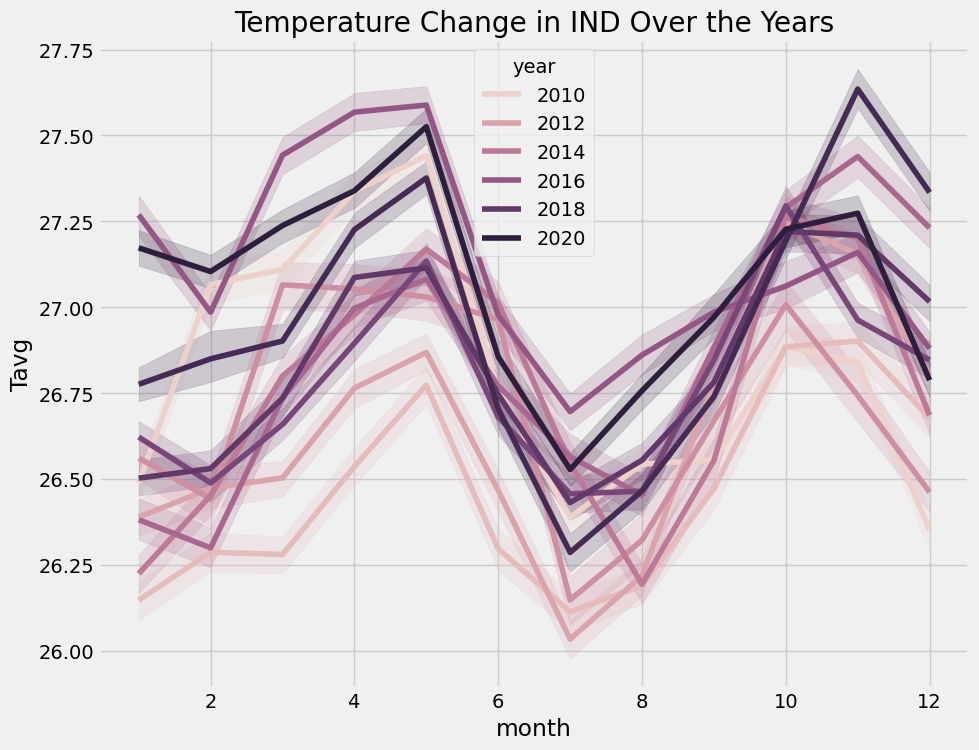

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.title("Temperature Change in IND Over the Years")
sns.lineplot(data = train, x='month', y='Tavg', hue='year')
plt.show()

In [22]:
forecast_data = train.rename(columns = {"date": "ds",
                                       "Tavg": "y"})
print(forecast_data)

               ds    Tn    Tx     y  RH_avg    RR   ss  ff_avg  year  month
0      2010-01-01  21.4  30.2  27.1    82.0   9.0  0.5    5.00  2010      1
1      2010-01-02  21.0  29.6  25.7    95.0  24.0  0.2    4.00  2010      1
2      2010-01-03  20.2  26.8  24.5    98.0  63.0  0.0    4.00  2010      1
3      2010-01-04  21.0  29.2  25.8    90.0   0.0  0.1    3.00  2010      1
4      2010-01-05  21.2  30.0  26.7    90.0   2.0  0.4    3.25  2010      1
...           ...   ...   ...   ...     ...   ...  ...     ...   ...    ...
589260 2020-12-27  25.2  31.2  29.2    74.0   0.0  1.4    2.00  2020     12
589261 2020-12-28  25.3  31.6  28.1    78.0   0.0  3.0    2.00  2020     12
589262 2020-12-29  24.6  32.3  28.4    81.0   0.0  6.5    2.00  2020     12
589263 2020-12-30  25.2  32.6  28.4    80.0   0.0  2.4    2.00  2020     12
589264 2020-12-31  24.3  32.0  26.7    86.0  26.6  5.8    2.00  2020     12

[589265 rows x 10 columns]


In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)